# Project 1: Titanic Dataset

## Introduction

The following is an analysis of the Titanic dataset provided via the Kaggle website for use in the Udacity Data Analyst Nanodegree. Additional descriptions can be found on the website, but the dataset consists of a csv file containing passenger information for those aboard the Titanic including ticket, demographic, and survival data per person.  

This report includes the exploration of the general dataset and the investigation of the following 3 questions: 

    Question 1: Does sex help predict survival?

    Question 2: As the saying goes, are women and children really first?

    Question 3: If we group survivors and non-survivors into two different pools and examine them, will we find any differences? 





## Data Descriptions: https://www.kaggle.com/c/titanic/data

Variable	Definition	Key
survival:	Survival	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [46]:
# Import relevant Libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Wrangling

### General Properties

In [47]:
#Read the CSV File in 

titanic = pd.read_csv('titanic-data.csv')
lendata = len(titanic['PassengerId'].unique())

print "Length of all PassengerId's", len(titanic['PassengerId'])
print "Length of unique PassengerId's" , lendata
print "Titanic Head Starts Here " 
print "" 
print titanic.head()
                      

Length of all PassengerId's 891
Length of unique PassengerId's 891
Titanic Head Starts Here 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0      

In [48]:
print titanic.describe()
#age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Right away we can tell that part of the data is missing for Age and Cabin variables. 

Other than this, nothing seems to be completely off and there don't seem to be many outliers (though a large difference in Fares does seem to be of interest). All data exists for most variables.

We'll investigate the fares first then the Age/Cabin data. 

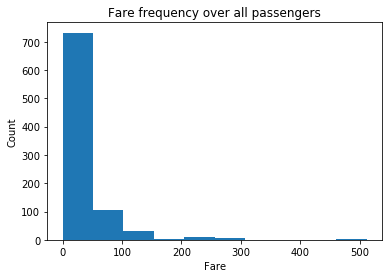

In [49]:
# What does the overall distribution of fares look like?
#titanic['Fare'].hist(bins = 20)
table = titanic['Fare']
# plot 
ax = table.plot.hist(bins = 10 )
ax.set(title= 'Fare frequency over all passengers', xlabel='Fare', ylabel= 'Count',)
# Fix rotation in the x-ticks
#ax.set_xticklabels(ax.get_xmajorticklabels());





From the above we can see that most passengers paid under $100 for their tickets but a few paid much more. Are these a mistake? What happens if we look further?

In [50]:
# What is the max fare paid and who paid it? 
maxfare = titanic['Fare'].max()
maxfareloc = titanic['Fare'].argmax()
maxfareinfo = titanic.loc[[titanic['Fare'].argmax()]]
maxfareticketno = maxfareinfo['Ticket'][maxfareloc]
someoneoverpaid = titanic[titanic['Ticket'] == maxfareticketno]

print "maxfare: ", maxfare
print "maxfareloc: ", maxfareloc
print "maxfareinfo: " 
print ""
print maxfareinfo
print ""

print "Passengers with most expensive tickets: ", 
print "" 
print titanic[titanic['Ticket'] == maxfareticketno]



maxfare:  512.3292
maxfareloc:  258
maxfareinfo: 

     PassengerId  Survived  Pclass              Name     Sex   Age  SibSp  \
258          259         1       1  Ward, Miss. Anna  female  35.0      0   

     Parch    Ticket      Fare Cabin Embarked  
258      0  PC 17755  512.3292   NaN        C  

Passengers with most expensive tickets:  
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  


From the above, we can see that there were a few passengers who paid the expensive fare. After a quick google search, it seems that their fares were in fact $512. We can leave these as is and continue our investigation. 

Resource: 
https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html


Now, we can resume our investigation into the missing data for the Age and Cabin variables. 

The number of passenger IDs we have is 891, but the count for Age is only 714. 

Is there a reason many of the Ages and Cabin identifications are missing? How many values are missing? 


In [51]:
print "Age Nulls"
print ""
print titanic.isnull().groupby('Age').apply(len)
print ""
print "Cabin Nulls"
print ""
print titanic.isnull().groupby('Cabin').apply(len)

Age Nulls

Age
False    714
True     177
dtype: int64

Cabin Nulls

Cabin
False    204
True     687
dtype: int64


It appears that most of the Cabin data is missing, and a sizable portion of the Age data is missing as well. This may be due to cabin assignment aboard the Titanic and processes put in place to record/obtain this data. 

What happens if we take a high-level look at the two null sets in comparison with the overall data?

In [52]:
print "All Data" 
print ""
print titanic.describe()
print ""
print "Age Nulls" 
print "" 
print titanic[titanic['Age'].isnull()].describe()
print ""
print "Cabin Nulls" 
print "" 
print titanic[titanic['Cabin'].isnull()].describe()

All Data

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Age Nulls

       PassengerId    Survived      Pclass  Age       SibSp

It seems that both sets of nulls may have a lower rate of survival and lower fare means, but nothing seems as if the nulls have a systematic consistency to them. We don't know too much about how/when the data points were recorded so we can't say for sure. 

What if we look at the individual observations?

In [53]:
print titanic[titanic['Age'].isnull()]


     PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121         

In [54]:
print titanic[titanic['Cabin'].isnull()]

     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
4              5         0       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
9             10         1       2   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
22            23         1       3   
24            25         0       3   
25            26         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
30            31         0       1   
32            33         1       3   
33            34         0       2   
34          

I found nothing concerning or consistent in examining the above data sets of nulls. This leads me to believe that we may choose to discard the data or continue using without harm to our analyses. Because our pandas will treat the NaN values as 0s, we can safely continue the rest of our analysis for now. 

### Data Cleaning

For our current purpose of investigating the Dataset, we will choose to move forward with the data as is. NaN values will be treated as 0 and will not contribute to the statistics to be computed. However, within those observations for which a variable has a NaN value, other variables that are recorded will still be taken into account. i.e. if age is missing, we can still use their fare value since that is still likely to be accurate. 

# Data Exploration: 

## General Exploration

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64



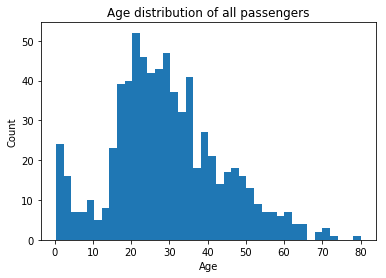

In [55]:
#Start Exploring the data 
#What is the general makeup of the Titanic passengers? 

print titanic['Age'].describe()
#Note on age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
print ""

#titanic.hist(['Age'], bins= 40)
table = titanic['Age']
# plot 
ax = table.plot.hist(bins = 40 )
ax.set(title= 'Age distribution of all passengers', xlabel='Age', ylabel= 'Count',)
# Fix rotation in the x-ticks
#ax.set_xticklabels(ax.get_xmajorticklabels());




In [56]:
# Population seems to be mostly comprised of adults age 18-40 
# There are a fair number of children and persons above age 50 as well 
# What does the overall data look like?

In [57]:
print titanic.describe()
#age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [58]:
# Seems legit...though we did look at this earlier 
# titanic.groupby('Survived').describe()
# What if we look at how many people survived?

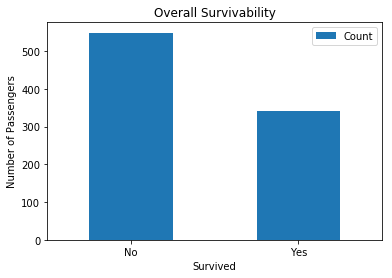

In [59]:
newtable = titanic.groupby('Survived')['Fare'].agg(['count'])

newtable.rename(columns={'count': 'Count'}, inplace= True)
# plot 
ax = newtable.plot.bar()
ax.set(title= 'Overall Survivability', xlabel='Survived', ylabel= 'Number of Passengers',)
# Fix rotation in the x-ticks
ax.set_xticklabels(('No', 'Yes'), rotation=0);

# Overall, how many people survivived and how many didn't?

In [60]:
# What factors might correlate with survival?
correlations = titanic.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [61]:
# What if we want to look at only the highest correlated variables? 
highestcorr = correlations[(abs(correlations)>=.2)]
highestcorr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,1.000000,-0.338481,NaN,NaN,NaN,0.257307
Pclass,NaN,-0.338481,1.000000,-0.369226,NaN,NaN,-0.549500
Age,NaN,NaN,-0.369226,1.000000,-0.308247,NaN,NaN
SibSp,NaN,NaN,NaN,-0.308247,1.000000,0.414838,NaN
Parch,NaN,NaN,NaN,NaN,0.414838,1.000000,0.216225
Fare,NaN,0.257307,-0.549500,NaN,NaN,0.216225,1.000000


Note: 
Passenger class and Fare are the top items correlated with Survival. 
    -This may mean that the higher class your fare, the more likely you were to be close to an emergency exit route 

Age and Passenger class are inversely correlated. As one increases, the other decreases. Since the highest class is the lowest number, this means that Age and Passenger class are positively correlated in that as Age increases, you're more likely to have a better Passenger class. 





Counts
male      577
female    314
Name: Sex, dtype: int64


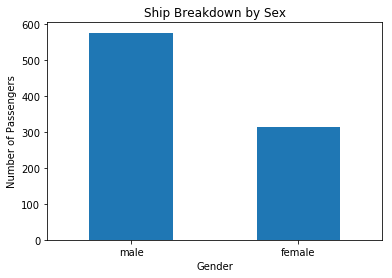

In [62]:
# What was the ship's breakdown by sex?
# primarily males 

table = titanic.Sex.value_counts()
print "Counts"
print titanic.Sex.value_counts()

#titanic.Sex.value_counts().plot(kind='bar')

# plot 
ax = table.plot.bar()
ax.set(title= 'Ship Breakdown by Sex', xlabel='Gender', ylabel= 'Number of Passengers',)
# Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0);


## Question 1: Does sex help predict survival?

What if we break this down by whether or not they survived?

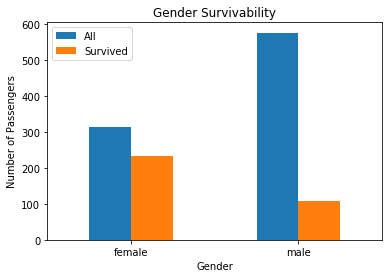

In [63]:
table = titanic.groupby('Sex')['Survived'].agg(['count', 'sum'])

table.rename(columns={'count':'All', 'sum':'Survived'}, inplace= True)

# plot 
ax = table.plot.bar()
ax.set(title= 'Gender Survivability', xlabel='Gender', ylabel= 'Number of Passengers',)
# Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0);

In [64]:
#grouping the data by sex and whether or not they survived 
survivalbysex = titanic.groupby(['Sex','Survived'], as_index= False)

#print survivalbysex.groups
#groupedbysex['female'].describe



In [65]:
print survivalbysex.apply(len)
femalerates= survivalbysex.apply(len)['female']
malerates= survivalbysex.apply(len)['male']

print ("Female Survival rate = ", titanic.query("Sex=='female'")['Survived'].mean()) 
print ("Male Survival rate = ", titanic.query("Sex=='male'")['Survived'].mean())


#table = survivalbysex.apply(len)



# plot 
#ax = table.plot.bar(color =('blue', 'orange', 'blue', 'orange'))
#ax.set(title= 'Survival Breakdown by Sex', xlabel='Gender, Survived', ylabel= 'Number of Passengers')
# Fix rotation in the x-ticks
#ax.set_xticklabels((('Female', 'No'), ('Female', 'Yes'), ('Male', 'No'), ('Male', 'Yes')), rotation=0) ;



Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64
('Female Survival rate = ', 0.7420382165605095)
('Male Survival rate = ', 0.18890814558058924)


Observations: 
Although there were a greater number of males onboard overall, more females survived the sinking than males
Survival rates: 
Females: 74%
Males: 18.9%

## Question 2: As the saying goes, are women and children really first?


In [66]:
# Need to create classes of age groups 
# 0-5 toddlers 
# 5-10 children 
# 11-18 teen 
# 19-25 young adult 
# 26-35 adult 
# 35-45 older adult 
# 46-60 before retirement 
# 60-100 elderly 

# Need to define a function that will take in the ages and provide an age classification 
def ageclas(ages): 
    #print "LIST START HERE", alist
    alist= pd.DataFrame()
    i = ages
    #print passids
    if i<=5: 
        return 'toddler' 
    elif i<=10: 
        return 'children' 
    elif i<=18:
        return 'teen' 
    elif i<=25: 
        return 'young adult'
    elif i<=35: 
        return 'adult'
    elif i<=45: 
        return 'other adult'
    elif i<=60: 
        return 'before retirement'
    elif i<=100: 
        return 'elderly'
    else:
        return 'No Age'



In [67]:
#create dataframe with PassengerId as index 

indexedt= titanic.set_index(['PassengerId'])

#apply the AgeClass function to add a new column with the information 
AgeClass= indexedt.loc[:,'Age'].apply(ageclas)
indexedt['AgeClass']=AgeClass



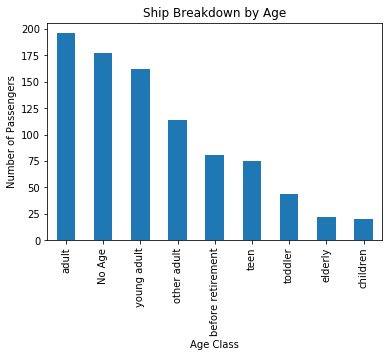

In [68]:
# Taking another look at the breakdown of the ship using the AgeClass
table = indexedt.AgeClass.value_counts()
#indexedt.AgeClass.value_counts().plot.bar()#(kind='bar')

# plot 
ax = table.plot.bar()
ax.set(title= 'Ship Breakdown by Age', xlabel='Age Class', ylabel= 'Number of Passengers',)
# Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels());



Here, we note that children and elderly are of the smallest groups aboard 

In [69]:
#Now, we want to see survival rates by Age using our newly designated AgeClass
#Grouping the data by AgeClass so we can explore 
groupedages= indexedt.groupby('AgeClass')


Count by AgeClass

AgeClass
No Age               177
adult                196
before retirement     81
children              20
elderly               22
other adult          114
teen                  75
toddler               44
young adult          162
Name: Survived, dtype: int64

Means of each column...Nothing fascinating

                   Survived    Pclass        Age     SibSp     Parch  \
AgeClass                                                               
No Age             0.293785  2.598870        NaN  0.564972  0.180791   
adult              0.423469  2.295918  30.303571  0.316327  0.173469   
before retirement  0.407407  1.567901  51.648148  0.358025  0.271605   
children           0.350000  2.800000   8.150000  2.150000  1.550000   
elderly            0.227273  1.590909  66.022727  0.136364  0.272727   
other adult        0.394737  2.026316  39.986842  0.377193  0.640351   
teen               0.426667  2.493333  16.220000  0.760000  0.520000   
toddler            0.7045

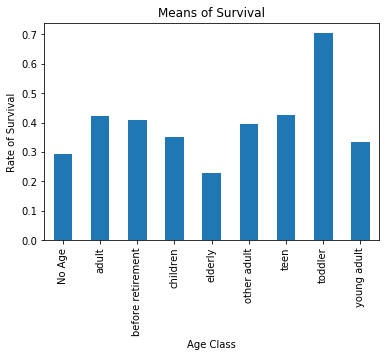

In [70]:
print "Count by AgeClass" # relates to the above histogram
print ""
print groupedages.count()['Survived']
print ""
print "Means of each column...Nothing fascinating"
print ""
print groupedages.mean() #after exploring the means a bit, there's not much else interesting besides the Survival 
print ""
print "Means of Survival (ha)" #the mean of each should be equal to the % of each group that survived 

table = groupedages['Survived'].mean()

# plot 
ax = table.plot.bar()
ax.set(title= 'Means of Survival', xlabel='Age Class', ylabel= 'Rate of Survival',)
# Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels());



It seems that the AgeClass most likely to survive were toddlers, giving some truth to the latter half of the saying "Women and Children first". 

#If we wanted to dive into this even further, we could look at any relationships between Age and Gender with surival 
#we'll save this for another time
#creating a new object grouped by Sex, Survial, and Age Class 
#new = indexedt.groupby(['Sex','Survived','AgeClass'], as_index= False)

#Now, let's look at the breakdown we created
#print new.apply(len)


## Question 3: If we group survivors and non-survivors into two different pools and examine them, will we find any differences? 

Note, a few Histograms start below but are unnecessary to reveal the relationship between age, gender, and survival. For that, I also used the survival rates by gender for each AgeClass in a bar chart 

In [71]:
# creating groups for survivors and people that weren't so lucky
survivors= indexedt[indexedt['Survived']>0]
unlucky= indexedt[indexedt['Survived']<1]

In [72]:
indexedt.describe() 


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
survivors.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


Above we notice that the mean for fare is higher in the surviving group and the mean for Pclass is also lower. This could mean that across other variables, the surviving class is more likely to be wealthier as they paid a higher fare and were more likely to be of the upper class. If we had a map of the Titanic data, we could see if the higher class cabins were located closer to life vessels. Earlier we also found that Passenger Class and Fare were the highest correlated numerical variables. 

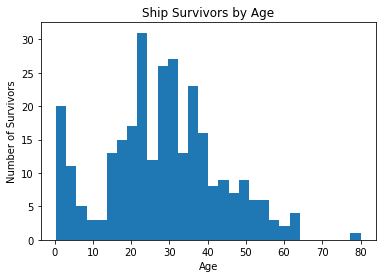

In [74]:
table = survivors['Age']
#Note, this seems to automatically remove NaNs
#survivors[survivors['Age']>0].hist('Age', bins=30)
#code produces the same output 
# plot 
ax = table.plot.hist(bins = 30 )
ax.set(title= 'Ship Survivors by Age', xlabel='Age', ylabel= 'Number of Survivors',)
# Fix rotation in the x-ticks
#ax.set_xticklabels(ax.get_xmajorticklabels());



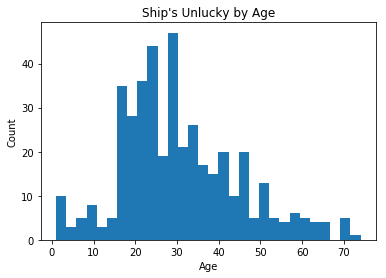

In [75]:
# Above we note a high number of children and a gap inbetween ages 65 and 80
# Could this mean many elderly persons could not make it off, or purposefully gave up their seats? 
#unlucky.hist('Age', bins=30)
table = unlucky['Age']
ax = table.plot.hist(bins = 30 )
ax.set(title= 'Ship\'s Unlucky by Age', xlabel='Age', ylabel= 'Count',)
# Fix rotation in the x-ticks
#ax.set_xticklabels(ax.get_xmajorticklabels());



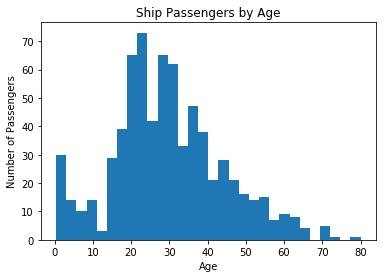

In [76]:
# Above we note the fewer amounts of persons under 20 and larger amounts of persons above 40 

# And now the overall Ages again to compare
#indexedt.hist('Age', bins=30)
table = indexedt['Age']
ax = table.plot.hist(bins = 30 )
ax.set(title= 'Ship Passengers by Age', xlabel='Age', ylabel= 'Number of Passengers',)
# Fix rotation in the x-ticks
#ax.set_xticklabels(ax.get_xmajorticklabels());



If we zoom in further on sex and age in relation to survival, will we see any patterns?

In [77]:
malesurvivors= survivors[survivors['Sex'] == 'male']
maleunlucky= unlucky[unlucky['Sex'] == 'male']

femalesurvivors= survivors[survivors['Sex'] == 'female']
femaleunlucky= unlucky[unlucky['Sex'] == 'female']


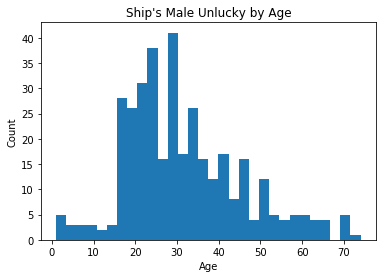

In [78]:
#maleunlucky.hist('Age', bins = 30)

table = maleunlucky['Age']
ax = table.plot.hist(bins = 30 )
ax.set(title= 'Ship\'s Male Unlucky by Age', xlabel='Age', ylabel= 'Count',)



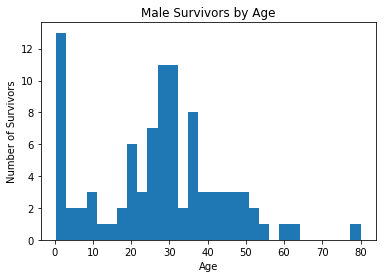

In [79]:
# Above, we note again the same trends with most unlucky people being above age 20
#malesurvivors.hist('Age', bins = 30)
table = malesurvivors['Age']
ax = table.plot.hist(bins = 30 )
ax.set(title= 'Male Survivors by Age', xlabel='Age', ylabel= 'Number of Survivors',)



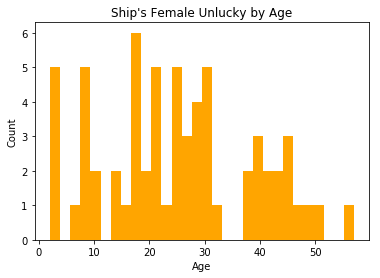

In [80]:
# Above we note the very few survivors above age 40 
#femaleunlucky.hist('Age', bins = 30)
table = femaleunlucky['Age']
ax = table.plot.hist(bins = 30 , color = 'orange')
ax.set(title= 'Ship\'s Female Unlucky by Age', xlabel='Age', ylabel= 'Count',)



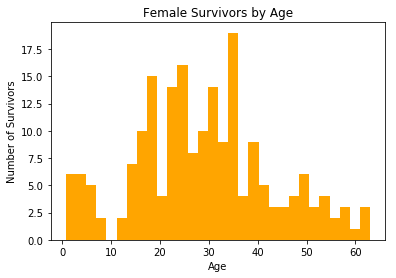

In [81]:
# First we note the scale has drastically changed with a high of 6  
#femalesurvivors.hist('Age', bins = 30)
table = femalesurvivors['Age']
ax = table.plot.hist(bins = 30, color = 'orange' )
ax.set(title= 'Female Survivors by Age', xlabel='Age', ylabel= 'Number of Survivors')




Next, we'll look at survival rates for each age class in by gender. This should be means of the survival column for each group. If we plot this into a bar chart, it should give us more insight in a simpler visual

Rates of Survival for Women


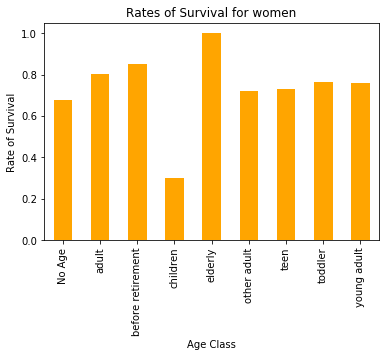

In [82]:
gendage= indexedt.groupby(['Sex','AgeClass'])
print "Rates of Survival for Women"
#gendage.mean()['Survived']['female'].plot(kind='bar')

table = gendage.mean()['Survived']['female']

# plot 
ax = table.plot.bar(color = 'orange')
ax.set(title= 'Rates of Survival for women', xlabel='Age Class', ylabel= 'Rate of Survival',)
# Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels());



Rates of Survival for Men


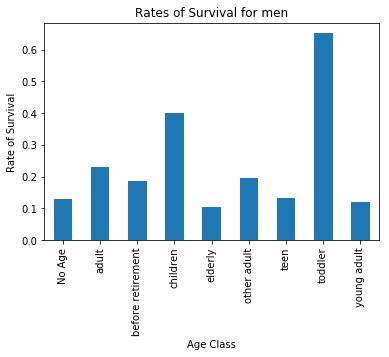

In [83]:
print "Rates of Survival for Men" 
#gendage.mean()['Survived']['male'].plot(kind='bar')

table = gendage.mean()['Survived']['male']

# plot 
ax = table.plot.bar()
ax.set(title= 'Rates of Survival for men', xlabel='Age Class', ylabel= 'Rate of Survival',)
# Fix rotation in the x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels());




In the above two bar charts, we note the much lower survival rate for men, but for toddlers and children, the rates are roughly the same. 

# Conclusion 

After initially exploring our dataset, we descovered that a significant amount of data was missing for the Cabin and Age variables. Upon further investigation, there was no discernable pattern to the missing data points. Because of this, we decided to leave the observations in as the other variables seemed to be sound and could contribute to our other analyses. We found no major errors in the data. Outliers did exist, but we chose to leave them in the dataset. Without further knowledge on the variable value meanings and the methods in which the data were recorded, we will not be able to definitively say we have removed all erroneous data. Further investigation was done only to explore questions raised, not to predict survival or establish cause/effect relationships (only correlations). 

Once we had checked the data for any potential errors, we decided to explore the relationship with various variables and survival to see if any correlated with survival rates. We posed 3 questions for further investigation.  

    Question 1: Does Sex help predict Survival?

    Question 2: As the saying goes, are Women and Children really first?

    Question 3: If we group survivors and non-survivors into two different pools and examine them, will we find any differences? 

In conclusion to my data exploration: 
    
    Sex did correlate with survival. Although there were more males on board, more women survived. 

    Rates of survival were higher for women and children, but also for the wealthier classes aboard. This may give some indication that there is truth to the saying "Women and Children first", with others being deprioritized for any lifeboats or perhaps volunteering to give up their spot. 

    Survivors were more likely to be of wealthier classes, young children, or elderly women while those less lucky were likely to be men over the age of 20. 

Overall, Sex, Age, and Class seemed to be the most important factors observed when looking at survival rates. 

# Resources: 
https://stackoverflow.com/
https://measuringu.com/handle-missing-data/
https://www.quora.com/How-do-you-handle-missing-data-statistics-What-imputation-techniques-do-you-recommend-or-follow
https://pandas.pydata.org/pandas-docs/stable/missing_data.html
https://pandas.pydata.org/
https://plot.ly/matplotlib/bar-charts/
https://matplotlib.org/
